In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [4]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.shape

(150, 5)

In [7]:
 # Basic Data Exploration
 print("\nBasic Information about Dataset:")
 print(iris.info())  # Overview of dataset


Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
 # Summary Statistics
 print("\nSummary Statistics:")
 print(iris.describe())  # Summary statistics of dataset


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
 # Check for missing values
 print("\nMissing Values in Each Column:")
 print(iris.isnull().sum())  # Count of missing values


Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [10]:
 iris.duplicated().sum()

np.int64(1)

## Univariate Analysis

<Figure size 1200x800 with 0 Axes>

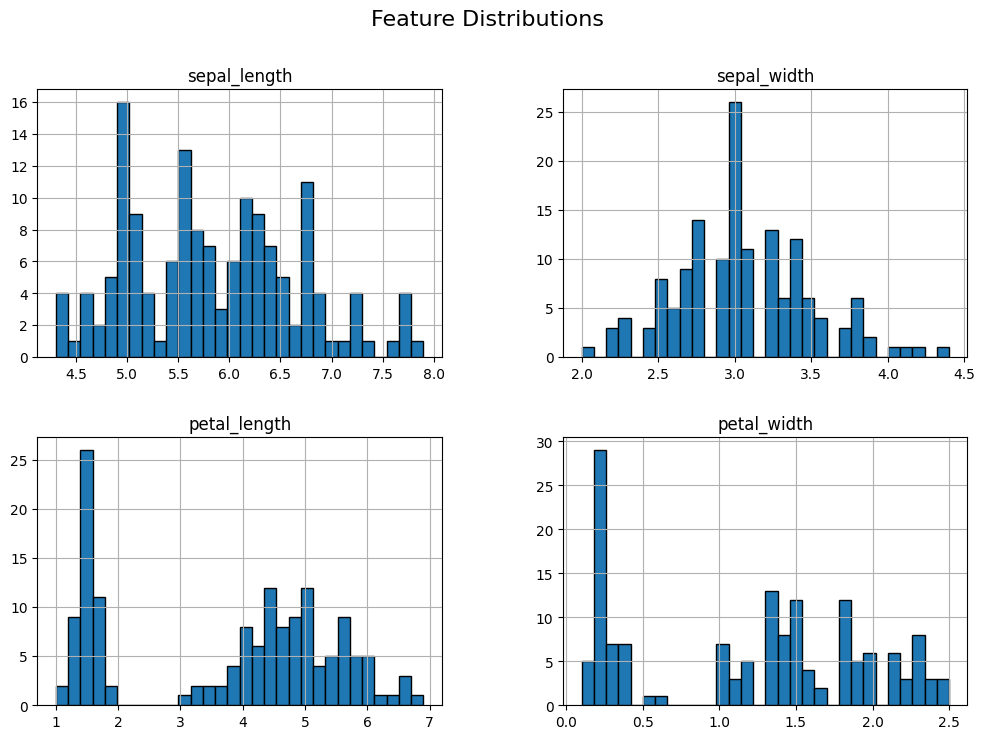

In [11]:
 # Histograms for distribution of features
 plt.figure(figsize=(12, 8))
 iris.hist(figsize=(12, 8), bins=30, edgecolor='black')
 plt.suptitle("Feature Distributions", fontsize=16)
 plt.show()

 Inferences from Histograms:
 
 1. Sepal Length:
The distribution of sepal length appears to be roughly normal with a slight skew
 towards the right.
 Most of the sepal lengths fall between 4.5 and 7.5 cm.
 2. Sepal Width:
 The distribution of sepal width is also roughly normal but with a slight skew
 towards the left.
 Most of the sepal widths fall between 2.5 and 3.5 cm.
 3. Petal Length:
 The distribution of petal length is more spread out and shows a clear separation
 between different species.
 There are distinct peaks indicating the presence of different species with varying
 petal lengths.
 4. Petal Width:

 Similar to petal length, the distribution of petal width shows clear separation
 between species.
 There are distinct peaks indicating the presence of different species with varying
 petal widths.

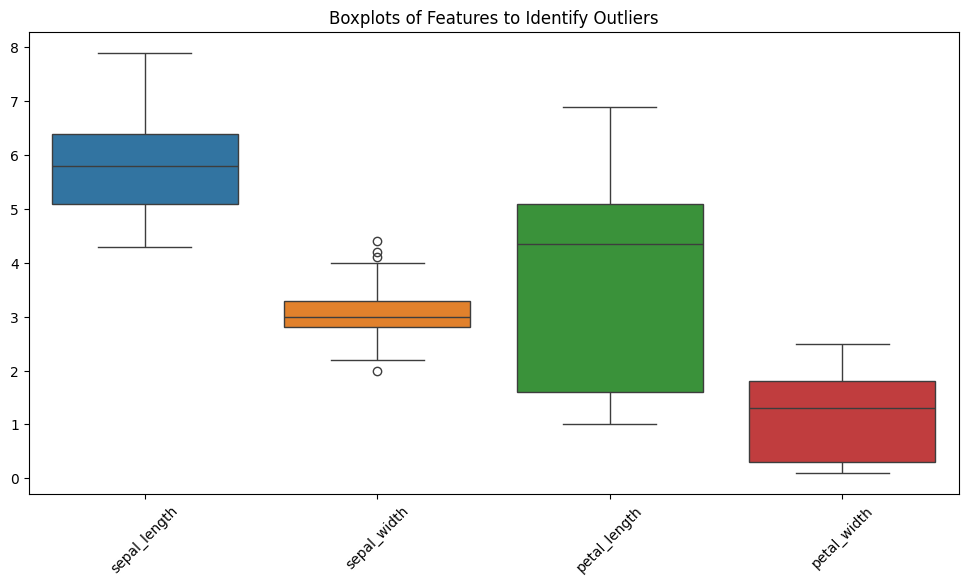

In [13]:
 # Boxplots for outlier detection
 plt.figure(figsize=(12, 6))
 sns.boxplot(data=iris)
 plt.xticks(rotation=45)
 plt.title("Boxplots of Features to Identify Outliers")
 plt.show()

Inferences from Boxplots:
 1. Sepal Length:
 There are a few outliers in the sepal length distribution.
 The median sepal length is around 5.8 cm, with the interquartile range (IQR)
 between 5.1 and 6.4 cm.
 2. Sepal Width:
 There are several outliers in the sepal width distribution.
 The median sepal width is around 3.0 cm, with the IQR between 2.8 and 3.3 cm.
 3. Petal Length:
 The petal length distribution shows clear separation between species, with minimal
 overlap.
 The median petal length varies significantly between species, indicating it is a good
 feature for classification.
 4. Petal Width:
 Similar to petal length, the petal width distribution shows clear separation between
 species.
 The median petal width varies significantly between species, indicating it is also a
 good feature for classification

 Heatmap: Visualizing the Correlation Matrix  

In [15]:
 num_col = iris.select_dtypes(include=[np.number]).columns
 cat_col = iris.select_dtypes(include=['object']).columns
 print(f"numerical_data {num_col}")
 print(f"categorical_data {cat_col}")

numerical_data Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
categorical_data Index(['species'], dtype='object')


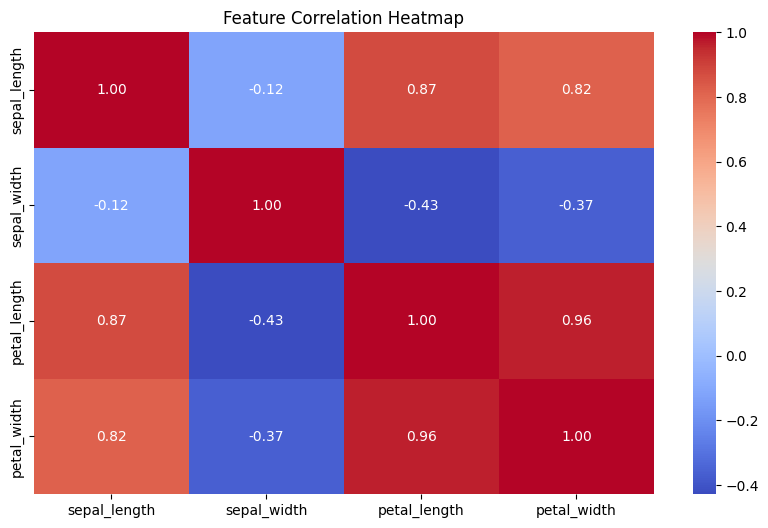

In [16]:
 # Correlation Matrix
 plt.figure(figsize=(10, 6))
 corr_matrix = iris[num_col].corr('pearson')
 sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
 plt.title("Feature Correlation Heatmap")
 plt.show()

Based on the heatmap of the correlation matrix, we can infer the following:
 1. Sepal Length:
 Positively correlated with petal length (0.87) and petal width (0.82).
 Weak negative correlation with sepal width (-0.12).
 2. Sepal Width:
 Weak negative correlation with sepal length (-0.12), petal length (-0.43), and petal
 width (-0.37).
 3. Petal Length:
 Strong positive correlation with sepal length (0.87) and petal width (0.96).
 Weak negative correlation with sepal width (-0.43).
 4. Petal Width:
 Strong positive correlation with petal length (0.96) and sepal length (0.82).
 Weak negative correlation with sepal width (-0.37).
 5. Species:
 Strong positive correlation with petal length (0.95) and petal width (0.96).
 Moderate positive correlation with sepal length (0.78).
 Moderate negative correlation with sepal width (-0.43).
 These correlations suggest that petal length and petal width are highly correlated with each
 other and with the species of the iris flower, making them important features for
classification. Sepal length also shows a moderate correlation with species, while sepal width
 has a weaker correlation with species

In [17]:
 # Encode target labels
 label_encoder = LabelEncoder()
 iris["species"] = label_encoder.fit_transform(iris["species"])

In [18]:
 # Define features and target
 X = iris.drop(columns=["species"])
 y = iris["species"]

In [21]:
 # Split into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
 # Function to evaluate k-NN for different values of k
 def evaluate_knn(k_values, weights='uniform'):
    results = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[k] = {'accuracy': accuracy, 'f1_score': f1}
    return results

In [24]:
# Test for k = 1, 3, 5
k_values = [1, 3, 5]
regular_knn_results = evaluate_knn(k_values, weights='uniform')
weighted_knn_results = evaluate_knn(k_values, weights='distance')

In [25]:
 # Convert results to DataFrame for comparison
 results_df = pd.DataFrame.from_dict({
    'Regular k-NN': regular_knn_results,
    'Weighted k-NN': weighted_knn_results
 }, orient='index').T
 results_df

,Regular k-NN,Weighted k-NN
1,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
3,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
5,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"


##  conclusion

 Based on the results of the k-NN algorithm applied to the Iris dataset, we can derive the
 following key insight:
 Both the regular k-NN and weighted k-NN classifiers achieved perfect accuracy and F1
scores for the tested values of k (1, 3, 5)
This indicates that the Iris dataset is well-suited for classification using the k-NN
 algorithm, and the features (sepal length, sepal width, petal length, petal width) are
 highly discriminative for distinguishing between the different species of Iris flowers.
 The high performance of both regular and weighted k-NN suggests that the dataset is
 not significantly affected by the distance weighting, likely due to the clear separation
 between classes in the feature space